<a href="https://colab.research.google.com/github/learning-stack/Colab-ML-Playbook/blob/master/handson-ml/python_workshop_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png" width="50%">
</center>

----------

<h1 align="center"> Python for Data Science </h1>
<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>WeCloudData Academy </font></center>
<br>
<center align="left"> <font size='4' color='#FF5713'> Accelerating your data science career! </font></center>
<br>

----------

<h1><center>Why Python?</center></h1>
<center>
    <img src="https://imgs.xkcd.com/comics/python.png" width="40%">
</center>

-----

# $\Omega$ Pandas

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cd/Panda_Cub_from_Wolong%2C_Sichuan%2C_China.JPG" width="30%">

> `pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

> `pandas` is well suited for many different kinds of data:

> * Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

For more tutorials, visit: https://pandas.pydata.org/pandas-docs/stable/tutorials.html

-----

In [0]:
1 + 1

### Imports

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
%lsmagic

### Read data

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/vinnywcd/datasets/master/titanic.csv')

### Help

In [0]:
pd.read_csv?

### Get first n rows

In [0]:
titanic.head()

### Dataframe dimensions

In [0]:
titanic.shape

### Index

In [0]:
titanic.index

### Columns

In [0]:
titanic.columns

### Dataframe information

In [0]:
titanic.info()

### Summary statistics for numeric columns

# $\Omega$ Selecting Data

### Select column

### Select multiple columns

In [0]:
titanic[['name','age','fare']]

### Select rows and columns by name

In [0]:
titanic.loc[7, ['age', 'name']]

### Select rows and columns by range of indices

In [0]:
titanic.iloc[7:15, [3, 8]]

### Select rows based on condition (filter)

In [0]:
titanic['age'] > 18


In [0]:
titanic[titanic['age'] > 18]

## $\Delta$ Exercise 1 - Dinesafe Data

https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/

**Questions:**
1. Read the trip data `data/dinesafe.csv`
2. Show the last 10 rows
3. Show the summary statistics
4. Select columns "latitude" and "longitude" and rows 100 to 200
5. Select age greater than 50

In [0]:
########################
# Your Code Below
########################


In [0]:
dinesafe = pd.read_csv('https://raw.githubusercontent.com/vinnywcd/datasets/master/dinesafe.csv')

In [0]:
dinesafe.head()

In [0]:
#dinesafe.iloc[-10:]
dinesafe.tail(10)

In [0]:
dinesafe.info()

In [0]:
dinesafe.describe()

In [0]:
# Select columns "latitude" and "longitude" and rows 100 to 200
#dinesafe.iloc[101:200, [6, 7]]
dinesafe.loc[100:200, ['LATITUDE','LONGITUDE']]

In [0]:
# Select age greater than 50
dinesafe[dinesafe['AMOUNT_FINED'] > 50]

# $\Omega$ Transforming Data

### Calculate ticket price in today's dollar
According to the Bureau of Labor Statistics consumer price index, prices in 2018 are 2,669.00% higher than prices in 1909. The dollar experienced an average inflation rate of 3.09% per year.

In [0]:
titanic['fare'] * 26.69

### Add new column

In [0]:
titanic['fare_2018'] = titanic['fare'] * 26.69

In [0]:
titanic.head()

### Count missing values

In [0]:
titanic['age'].isnull().sum()

In [0]:
titanic.isnull().sum()

### Calculate mean

In [0]:
mean_age = titanic['age'].mean()

In [0]:
mean_age

### Fill missing values

In [0]:
titanic['age']=titanic['age'].fillna(mean_age)

In [0]:
titanic.isnull().sum()

### Count categorical data

In [0]:
titanic['sex'].value_counts()

### Groupby & aggregate

In [0]:
titanic.groupby('sex')['survived'].sum()

### Save new dataframe as csv

In [0]:
titanic.to_csv('new_titanic.csv')

In [0]:
!ls

In [0]:
!head new_titanic.csv

## $\Delta$ Exercise 2 - Dinesafe Data

**Questions:**
1. Count the missing values in `AMOUNT_FINED` as a percentage
2. Create a new column called `AMOUNT_FINED_NOTNULL` and replace the missing values with 0
3. Get a count of every category in `ESTABLISHMENTTYPE`
4. For every category in `ESTABLISHMENTTYPE` get a count of those that were fined

In [0]:
########################
# Your Code Below
########################

In [0]:
#Count the missing values in AMOUNT_FINED as a percentage
dinesafe['AMOUNT_FINE'].isnull().sum() / dinesafe.shape[0]

#Create a new column called AMOUNT_FINED_NOTNULL and replace the missing values with 0
dinesafe['AMOUNT_FINED_NOTNULL'] = dinesafe['AMOUNT_FINED'].fillna(0)



In [0]:
#Get a count of every category in ESTABLISHMENTTYPE
dinesafe['ESTABLISHMENTTYPE'].value_counts()

In [0]:
#For every category in ESTABLISHMENTTYPE get a count of those that were fined
dinesafe.groupby('ESTABLISHMENTTYPE')['AMOUNT_FINED'].count().sort_values(ascending=False)


In [0]:
#average value
dinesafe.groupby('ESTABLISHMENTTYPE')['AMOUNT_FINED'].mean().sort_values(ascending=False)

# $\Omega$ Data Visualization
https://pandas.pydata.org/pandas-docs/stable/visualization.html

### Bar plot

In [0]:
titanic['sex'].value_counts().plot(kind='bar')

### Pie plot

In [0]:
titanic['sex'].value_counts().plot(kind='pie')

### Set figure size

In [0]:
titanic['sex'].value_counts().plot(kind='bar', figsize=(10,5))

### Histogram

In [0]:
titanic['age'].plot(kind='hist')

### Set histogram bin size

In [0]:
titanic['age'].plot(kind='hist', bins=50)

### Boxplot

In [0]:
titanic['age'].plot(kind='box')

In [0]:
titanic[['age','fare']].plot(kind='box')

### Scatter plot

In [0]:
titanic.plot(kind='scatter', x='age', y='fare')

### Transform then plot

In [0]:
titanic['sex'].value_counts().plot('bar')

## $\Delta$  Exercise 3 - Dinesafe Data

**Questions:**
1. Create a bar plot of `ESTABLISHMENT_STATUS`
2. Create a new dataframe called `dinesafe_fined` with only the rows where `AMOUNT_FINED` is not null
3. Create a boxplot of `AMOUNT_FINED` in this new dataframe
4. Create a histogram of `AMOUNT_FINED` with 30 bins
5. Create a **horizontal** bar plot of the mean `AMOUNT_FINED` by `ESTABLISHMENTTYPE`
6. Create a line plot of `INSPECTION_DATE` and `AMOUNT_FINED`

**Bonus:**
- Explore the dataset and see if you can come up with your own interesting analysis or plot

In [0]:
########################
# Your Code Below
########################

## $\Delta$  My Free Board

**You can do anything for this board**


In [0]:
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

In [3]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,124,96.712059,2.575276,0.148283,0.376759,0.187623,43298,75.107395,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,9,66.384340,32.900433,0.178807,0.451722,0.084698,6724,59.726353,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,34,96.571276,2.861717,0.233473,0.106731,0.226803,9669,69.334988,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,1139,95.254171,0.412257,0.149322,0.486918,3.697332,19272,75.472188,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,6,90.198766,9.372858,0.239890,0.085675,0.102810,3979,68.861523,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


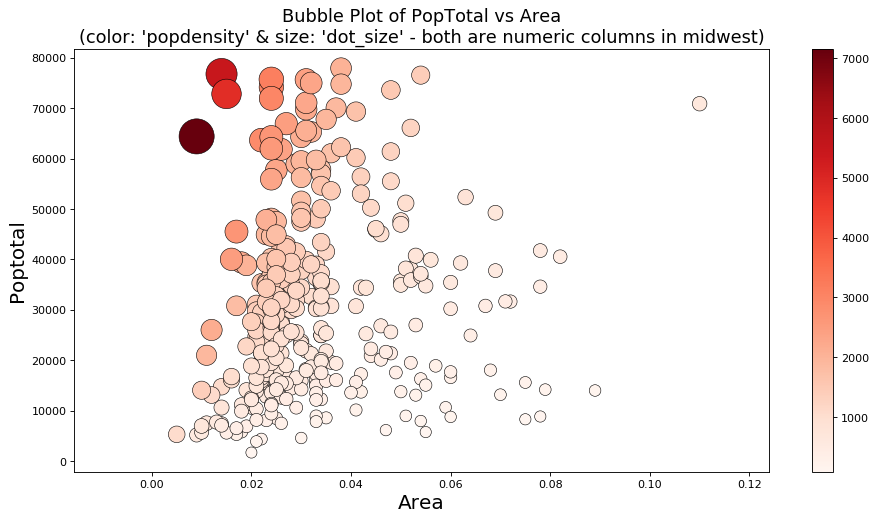

In [9]:
fig = plt.figure(figsize=(14,7), dpi=80, facecolor='w', edgecolor='k')
plt.scatter('area', 'poptotal', data=midwest, s='dot_size', c='popdensity', cmap='Reds', edgecolors='black', linewidth=.5)
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size' - both are numeric columns in midwest)", fontsize=16)
plt.xlabel('Area', fontsize=18)
plt.ylabel('Poptotal', fontsize=18)
plt.colorbar()
plt.show()